### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [4]:
df_comp['market_value']=df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

It is a special type of *time-series*, where the data does not follow a pattern, so it is unpredictable. White noise satisfies the following three conditions:

- Constant mean $\mu$
- Constant variance $\sigma^{2}$
- No autocorrelation $\rho$ for any period (no clear relationship between past and present values).

Since it's random, it can't be properly estimated by any type of model, hence - it's impossible to predict. Therefore, we need to be able to recognize when data is simply noise because:

A) We can't model it. Hence, if the residuals of a model are white noise, then it's a good estimator and complicating the model further will be fitting it to the data, rather than the other way around.

B) White noise is just a specific type of noise which has given characteristics. It's also know as Gaussian noise and has a mean of 0. There exist other forms of noise, but they aren't of our interest right now.

In [6]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

We used a random Normal Distribution, because Gaussian White Noise is the most commonly used for such randomization. Of course, you can make the case for using other distributions when creating the white noise data, as long as your time series resembles said distribution more than the normal one.

In [7]:
df['wn'] = wn

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.describe()

market_value           wn
count   5021.000000  5021.000000
mean    1091.651926  1089.740745
std      292.559287   292.110923
min      438.920000    87.843754
25%      914.620000   892.763325
50%     1144.650000  1085.901066
75%     1316.280729  1288.090012
max     1570.252238  2073.150456

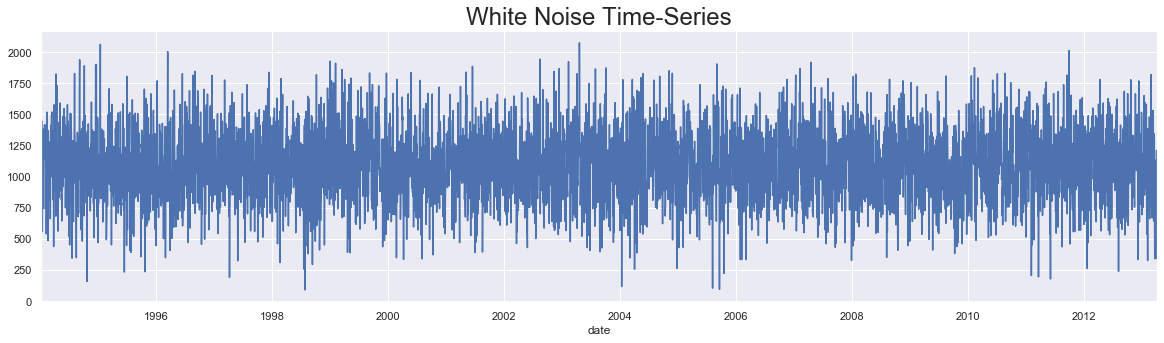

In [9]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

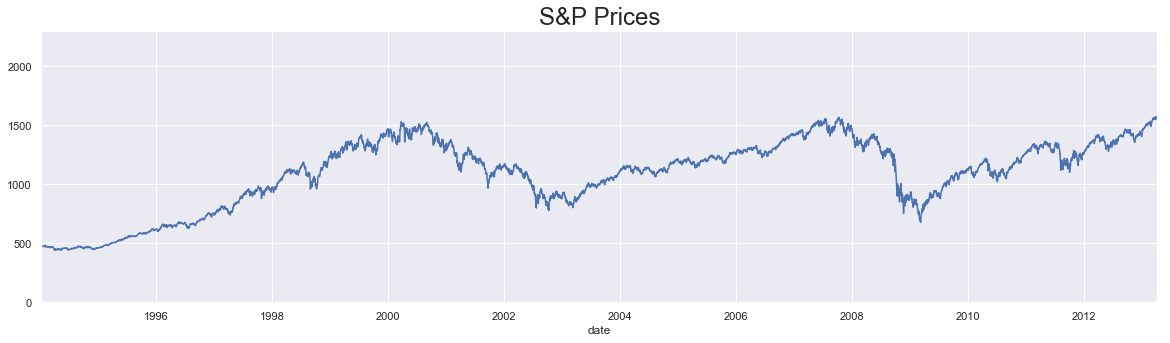

In [10]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

A special type of *time-series*, where values tend to persist over time and the differences between periods are simply white noise. Random walk is a time series distribution in which the general pattern(on the larger scale) is persistent through out, but when we look at the smaller scale(smaller periods), then we see no persistency in patterns i.e. a white noise.

En su forma más general, las caminatas aleatorias son cualquier proceso aleatorio donde la posición de una partícula en cierto instante depende solo de su posición en algún instante previo y alguna variable aleatoria que determina su subsecuente dirección y la longitud de paso. In short, if a time-series resembles a RW, it cannot be predicted well by only using past values.

However, since we know that some general pattern can be predicted among the S&P values (which we expect to persist in the future), then it's not a random walk.

In [10]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [11]:
rw.describe()

price
count  5021.000000
mean   1269.944293
std     444.216793
min     585.483034
25%     931.550429
50%    1156.363045
75%    1488.362029
max    2715.508720

In [13]:
df['rw'] = rw.price

In [14]:
df.head()

market_value           wn           rw
date                                              
1994-01-07        469.90  1059.089464  1122.139662
1994-01-10        475.27   885.137922  1080.347860
1994-01-11        474.13   680.919810  1082.095245
1994-01-12        474.17  1555.430981  1083.639265
1994-01-13        472.47  1157.200035  1067.146255

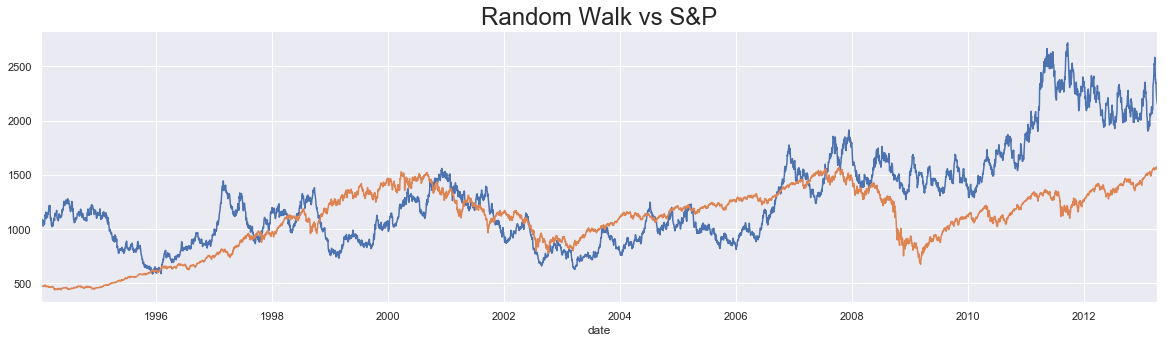

In [15]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [16]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [17]:
sts.adfuller(df.wn)

(-69.20331416010461,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70746.80114417049)

In [18]:
sts.adfuller(df.rw)

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

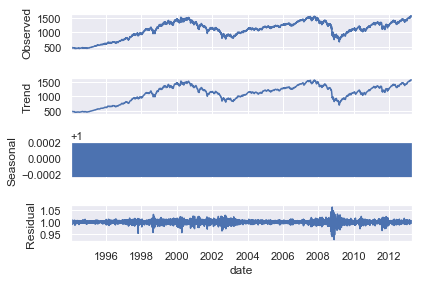

In [20]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

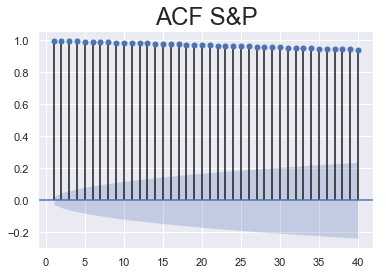

In [29]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### PACF

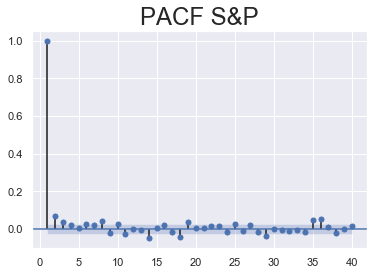

In [27]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

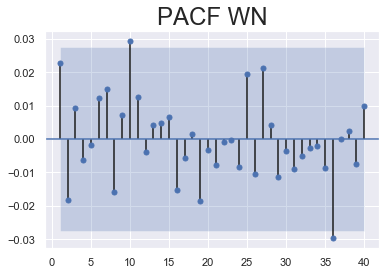

In [28]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()